# Segment Anything Model for Geospatial Data

[![image](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/opengeos/segment-geospatial/blob/main/docs/examples/satellite.ipynb)
[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeos/segment-geospatial/blob/main/docs/examples/satellite.ipynb)

This notebook shows how to use segment satellite imagery using the Segment Anything Model (SAM) with a few lines of code.

Make sure you use GPU runtime for this notebook. For Google Colab, go to `Runtime` -> `Change runtime type` and select `GPU` as the hardware accelerator.

## Install dependencies

Uncomment and run the following cell to install the required dependencies.


In [1]:
%pip install segment-geospatial

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 kB 9.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014

## Import libraries

In [1]:
import os
import leafmap
from samgeo import SamGeo, tms_to_geotiff, get_basemaps

## Create an interactive map

In [2]:
m = leafmap.Map(center=[34.7438, 119.4], zoom=15)
m.add_basemap("SATELLITE")
m

Map(center=[34.7438, 119.4], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom…

In [6]:
m.bounds

((34.735899396955816, 119.37113285064697),
 (34.757057055532755, 119.43979740142824))

Pan and zoom the map to select the area of interest. Use the draw tools to draw a polygon or rectangle on the map

In [7]:
if m.user_roi_bounds() is not None:
    bbox = m.user_roi_bounds()
else:
    bbox = m.bounds

In [11]:
bbox

((34.735899396955816, 119.37113285064697),
 (34.757057055532755, 119.43979740142824))

## Download map tiles

Download maps tiles and mosaic them into a single GeoTIFF file

In [3]:
image = "satellite.tif"

Besides the `satellite` basemap, you can use any of the following basemaps returned by the `get_basemaps()` function:

In [ ]:
# get_basemaps().keys()

Specify the basemap as the source.

In [13]:
tms_to_geotiff(output=image, bbox=[119.37113285064697, 34.735899396955816, 119.43979740142824, 34.757057055532755], zoom=18, source="Satellite", overwrite=True)

Downloaded image 0001/1020
Downloaded image 0002/1020
Downloaded image 0003/1020
Downloaded image 0004/1020
Downloaded image 0005/1020
Downloaded image 0006/1020
Downloaded image 0007/1020
Downloaded image 0008/1020
Downloaded image 0009/1020
Downloaded image 0010/1020
Downloaded image 0011/1020
Downloaded image 0012/1020
Downloaded image 0013/1020
Downloaded image 0014/1020
Downloaded image 0015/1020
Downloaded image 0016/1020
Downloaded image 0017/1020
Downloaded image 0018/1020
Downloaded image 0019/1020
Downloaded image 0020/1020
Downloaded image 0021/1020
Downloaded image 0022/1020
Downloaded image 0023/1020
Downloaded image 0024/1020
Downloaded image 0025/1020
Downloaded image 0026/1020
Downloaded image 0027/1020
Downloaded image 0028/1020
Downloaded image 0029/1020
Downloaded image 0030/1020
Downloaded image 0031/1020
Downloaded image 0032/1020
Downloaded image 0033/1020
Downloaded image 0034/1020
Downloaded image 0035/1020
Downloaded image 0036/1020
Downloaded image 0037/1020
D

You can also use your own image. Uncomment and run the following cell to use your own image.

In [ ]:
# image = '/path/to/your/own/image.tif'

Display the downloaded image on the map.

In [4]:
m.layers[-1].visible = False  # turn off the basemap
m.add_raster(image, layer_name="Image")
m

Map(bottom=3330286.0, center=[34.746478, 119.40546499999999], controls=(ZoomControl(options=['position', 'zoom…

## Initialize SAM class

In [8]:
sam = SamGeo(
    model_type="vit_h",
    checkpoint="sam_vit_h_4b8939.pth",
    sam_kwargs=None,
)

Model checkpoint for vit_h not found.


Downloading...
From: https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
To: /root/.cache/torch/hub/checkpoints/sam_vit_h_4b8939.pth
100%|██████████| 2.56G/2.56G [00:18<00:00, 135MB/s]


In [ ]:
# %pip install groundingdino-py


In [5]:
from samgeo.text_sam import LangSAM

sam = LangSAM()

final text_encoder_type: bert-base-uncased


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

groundingdino_swinb_cogcoor.pth:   0%|          | 0.00/938M [00:00<?, ?B/s]

In [6]:
text_prompt = "sea port"

In [7]:
sam.predict(image, text_prompt, box_threshold=0.24, text_threshold=0.24)

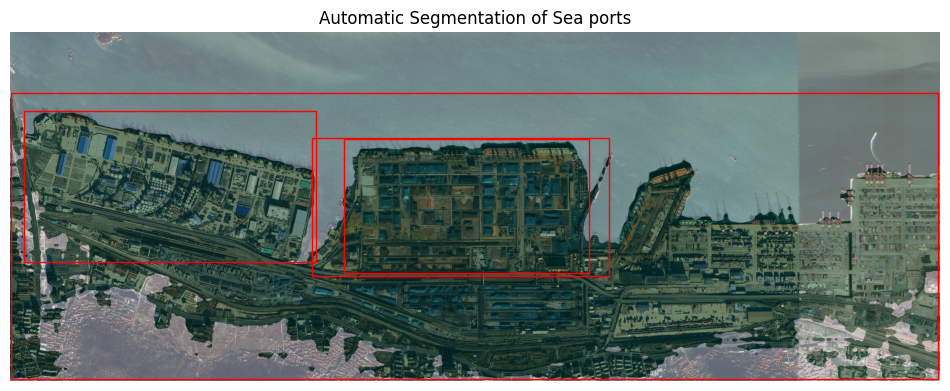

In [8]:
sam.show_anns(
    cmap="Greens",
    box_color="red",
    title="Automatic Segmentation of Sea ports",
    blend=True,
)

## Segment the image

Set `batch=True` to segment the image in batches. This is useful for large images that cannot fit in memory.

In [ ]:
mask = "segment.tif"
sam.generate(
    image, mask, batch=True, foreground=True, erosion_kernel=(3, 3), mask_multiplier=255
)

## Polygonize the raster data

Save the segmentation results as a GeoPackage file.

In [ ]:
vector = "segment.gpkg"
sam.tiff_to_gpkg(mask, vector, simplify_tolerance=None)

You can also save the segmentation results as any vector data format supported by GeoPandas.

In [ ]:
shapefile = "segment.shp"
sam.tiff_to_vector(mask, shapefile)

## Visualize the results

In [ ]:
style = {
    "color": "#3388ff",
    "weight": 2,
    "fillColor": "#7c4185",
    "fillOpacity": 0.5,
}
m.add_vector(vector, layer_name="Vector", style=style)
m

![](https://i.imgur.com/Ysq3u7E.png)